<a href="https://colab.research.google.com/github/MySureStart/MIT_FutureMakers_2023/blob/main/Module_06_Convolutional_Neural_Network/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

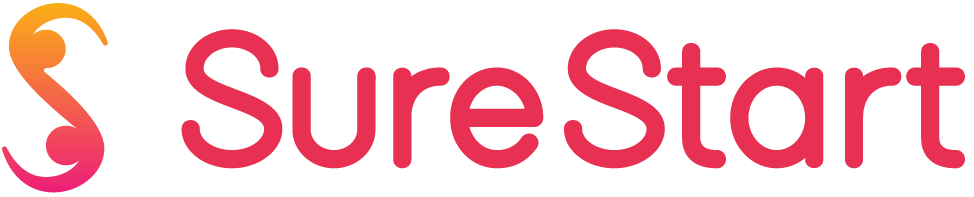

#Objectives

* To gain an understanding of the different types of layers and their roles in a CNN architecture.
* To learn how to classify common fashion items (specifically, the Fashion MNIST dataset) using different neural network structures and models.
* To reflect on how different neural networks architectures interact with the same datasets to produce unique results.


#Convolutional Neural Network

Let's begin looking by reviewing convolutions: A convolution is a filter that passes over an image, processes it, and extracts the important features. And while the idea of using filters on images exists before CNNs did, they are used here consecutively so that these filters compound to bigger patterns in a set of features. Such filters can be applied over many types of media but we shall be using them on images.

A basic convolutional neural network can be viewed as a series of convolutional layers, followed by an activation function, followed by a pooling (downscaling) layer, repeated many times.

With the repeated combination of these operations, the first layer detects simple features such as edges in an image, and the second layer begins to detect higher-level features. By the tenth layer, a convolutional neural network is able to detect more complex shapes such as eyes. By the twentieth layer, it is often able to differentiate human faces from one another. The power to discern info at these various levels of granularity comes from consecutive grouping of simpler sets of patterns, each of which can detect slightly higher-order features than the preceeding layer.


Assuming we are solving the problem of image classification using Deep Neural Networks, the number of neurons in any layer is decided by the developer. For a fully connected layer, usually it is the case that there is a neuron for each input.For an image, the number of neurons in a fully connected input layer would likely be equal to the number of pixels (unless the developer wanted to downsample the image).

Convolutional layers work a little differently. Each neuron in a convolutional layer has what we call a "local receptive field". This just means that the neuron is not connected to the entire input (which would be called fully connected) rather to just a section of the input (that must be spatially local). These input neurons provide abstractions of small sections of the input data, which when taken together over the whole input we call "a feature map".

An important feature of convolutional layers is that they are "spatially invariant" --- that is they look for the same features across the entire image. After all, you wouldn't want a neural network trained on object recognition to only recognise a bicycle if it is in the bottom left corner of the image. This spatial invariance is achieved by constraining all of the weights across the local receptive fields to be the same. Neurons in a convolutional layer that cover the entire input and look for one feature are called filters.

However, having the whole convolutional layer looking for just one feature (such as a corner) would massively limit the capacity of your network. So usually we allow the Convolutional Layer to learn its own features and make its own filters.

Source: https://stackoverflow.com/questions/52272592/how-many-neurons-does-the-cnn-input-layer-have

# CNN Components

The human brain processes a huge amount of information the second we see an image. Each neuron works in its own receptive field and is connected to other neurons in a way that they cover the entire visual field. Just as each neuron responds to stimuli only in the restricted region of the visual field called the $receptive field$ in the biological vision system, each neuron in a Convolutional Neural Network (CNN) processes data only in its receptive field as well. The layers are arranged in such a way so that they detect simpler patterns first (lines, curves, etc.) and more complex patterns (faces, objects, etc.) further along. For more info, [check out this article](https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939)

# Fashion MNIST

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "*If it doesn't work on MNIST, it won't work at all*", they said.

"*Well, if it does work on MNIST, it may still fail on others*." To the serious machine learning researchers, here are some good reasons:

1. MNIST is too easy. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. Check out our side-by-side benchmark for Fashion-MNIST vs. MNIST, and read "Most pairs of MNIST digits can be distinguished pretty well by just one pixel."
2. MNIST is overused. In this April 2017 Twitter thread, Google Brain research scientist and deep learning expert Ian Goodfellow called for people to move away from MNIST.
3. MNIST can not represent modern CV tasks, as noted in this April 2017 Twitter thread, deep learning expert/Keras author François Chollet.

Read more about the dataset here: [Source](https://github.com/zalandoresearch/fashion-mnist)

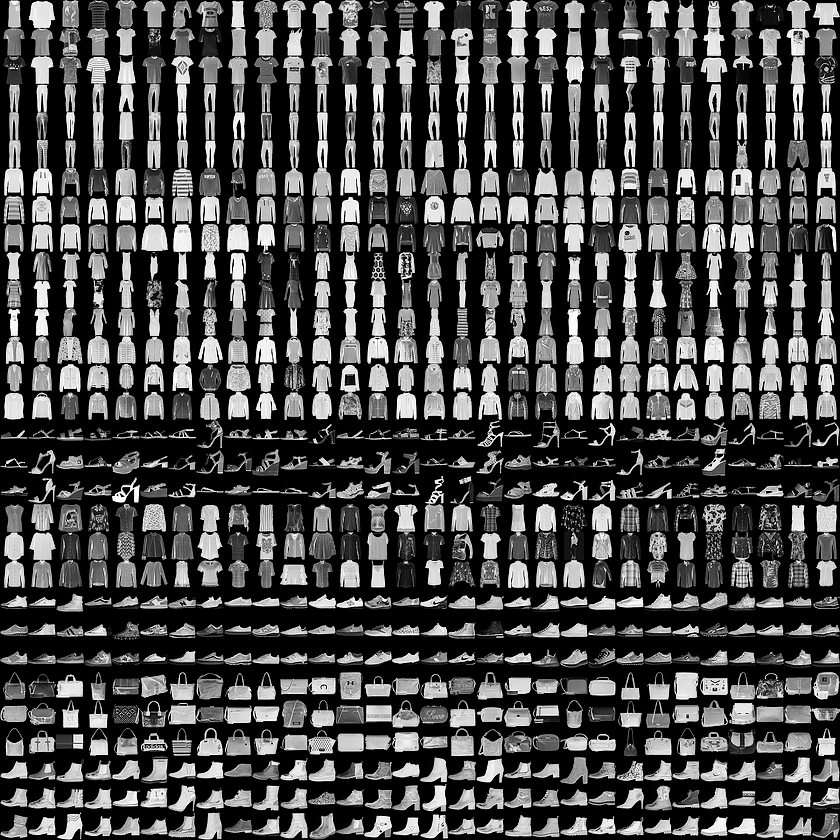

Let's prep to get begin doing some data manipulation, modeling and plotting!

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

And now let's get the Fashion MNIST data. Break it into train and test images.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

## Question 1
Why are we dividing the test and train images by 255?

(Discuss with team, search online and share your answer)



### Answer 1
< *Type your answer here* >

Let's build a straight-forward neural network model with two CNN layers. Each CNN layer consists of 32 filters and a 3 X 3 kernel size

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, # No. of filters
                         (3,3), # Kernel size
                         activation='relu',
                         input_shape=(28, 28, 1) # inputs are 28x28 RGB images with `channels_last` format
                         ),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(training_images, training_labels, epochs=5)

## Visualizing Filters
Perhaps the simplest visualization to perform is to plot "the learned filters" directly.

In neural network terminology, "the learned filters" are simply weights, yet because of the specialized two-dimensional structure of the filters, the weight values have a spatial relationship to each other and plotting each filter as a two-dimensional image is meaningful (or could be).

The first step is to review the filters in the model, to see what we have to work with.

The model summary printed in the previous section summarizes the output shape of each layer, e.g. the shape of the resulting feature maps. It does not give any idea of the shape of the filters (weights) in the network, only the total number of weights per layer.

We can access all of the layers of the model via the model.layers property.

Each layer has a layer.name property, where the convolutional layers have a naming convention like block#_conv#, where the ‘#‘ is an integer. Therefore, we can check the name of each layer and skip any that don’t contain the string ‘conv‘.

In [ ]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

Each convolutional layer has two sets of weights: One is the block of filters and the other is the block of bias values.

These sets of values are accessible via the layer.get_weights() function. We can retrieve these weights and then summarize their shape --- as we show in the code snippet above.

An architectural concern with a convolutional neural network is that the depth of a filter must match the depth of the input to the filter (e.g., the number of channels transmitting the information borne in the input).

A channel refer to the source containing a certain kind of information. For an image, these are usually colors. For a simple input image, three channels (for red, green and blue), might transmit the necessary information.

For such an image, each filter must have a depth of three. Consequently, we could visualize one such filter as a plot with three images, one for each channel, or compress all three down to a single color image, or even just look at the first channel and assume the other channels will look the same.

The issue is, we then have 63 other filters that we might like to visualize. So, we need to find a systematic visualization appproach.

We can retrieve the filters from the zeroth layer as follows:

In [ ]:
# retrieve weights from the first layer
filters, biases = model.layers[0].get_weights()

The weight values will likely be small positive and negative values centered around 0.0.

We can normalize their values to the range 0-1 to make them easy to visualize.

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

Now we can enumerate the first six filters out of the 32 in the block and plot each of the three channels of each filter.

We use the matplotlib library and plot each filter as a new row of subplots, and each filter channel or depth as a new column.

In [ ]:
print(filters.shape)
# plot first few filters
n_filters, ix = 6, 1
fig, ax = plt.subplots(n_filters, 3, figsize=(10, 10))
for i in range(n_filters):
  # get the filter
  f = filters[:, :, 0, i]
  # plot each channel separately
  for j in range(3):
    # specify subplot and turn of axis
	# plot filter channel in grayscale
    ax[i, j].imshow(f[:, :])
    ix += 1

## Question 2

Notice that all the filters in each row are the same. Why do you think that is the case?

Hint: To answer this question,  consider if the input images in the FASHION MNIST above is colored or gray-scaled. If they are grayscale images, how many input channels are needed to describe them?

\<*Type your answer here*\>

### Answer 2

< *Type your answer here* >

## Visualizing Feature Maps

The activation maps, called feature maps (which are output between layers in the neural network), capture the result of applying the filters to the input, such as the input image or another feature map.

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input layers of the model detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

First, we need a clearer idea of the shape of the feature maps output by each of the convolutional layers and the layer index number so that we can retrieve the appropriate layer output.

The example below will enumerate all trainable convolution layers in the model and print the output size or feature map size for each convolutional layer as well as the layer index in the model.

In [ ]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

We can use this information and design a new model that is a subset of the layers in the model. The model would have the same input layer as the original model, but the output would be the output of a given convolutional layer, which we know would be the activation of the layer or the feature map.

For example, after loading the model, we can define a new model that outputs a feature map from the first convolutional layer (specified by index = 0 in the code snippet below) as follows.

In [ ]:
# redefine model to output right after the first hidden layer
model_x = tf.keras.models.Sequential(model.get_layer(name = None , index = 0))

Making a prediction with this model will produce the feature map for the first convolutional layer for a given provided input image. Let’s implement this.

We can do this easily by calling the model.predict() function and passing in the prepared test images.

In [ ]:
# get feature map for first hidden layer
feature_maps = model_x.predict(test_images)

In [ ]:
# plot all 32 maps in an 8x8 squares
ix = 1
print(feature_maps.shape)
# specify subplot and turn of axis
fig, ax = plt.subplots(8, 4, figsize=(10, 10))
for i in range(8):
	for j in range(4):
		# plot filter channel in grayscale
		ax[i, j].imshow(feature_maps[0, :, :, ix-1])
		ix += 1

## Question 3
In the code blocks above, we showed you how to visualize the feature maps for the first layer. Now you visualize the feature map of the second convolutional layer.

Hint: See the sections above to identify how you should go about doing the various steps needed: a) redefine model to output right after the second hidden layer; b) get its feature map; and c) plot the feature maps corresponding to each of the 32 filters in a systematic manner.

### Answer 3

In [ ]:
# redefine model to output right after the second hidden layer
model_x = tf.keras.models.Sequential([
	# Add layers to visualize
	])

# get feature map for first hidden layer
feature_maps = model_x.predict(test_images)
print(feature_maps.shape)
# plot all 32 maps in an 8x8 squares
ix = 1
# specify subplot and turn of axis
fig, ax = plt.subplots(8, 4, figsize=(10, 10))
for i in range(8):
	for j in range(4):
		# plot filter channel in grayscale
		ax[i, j].imshow(feature_maps[0, :, :, ix-1])
		ix += 1

#Overfitting and Regularization

Overfitting is a phenomena that happens when your training dataset is not large enough to accomodate the number of features, that can theoretically be used for classification/prediction by the neural network model you have built to learn the prediction task.

A consequence of overfitting is that model "memorizes" the training data and is unable to generalize to the new data it sees during training. A signal that overfitting is likely happening during training is that a very high difference between training error and the test error is observed.

In the next three sections, we will outline three techniques for mitigating overfitting.

##Pooling Layer with Padding
A purpose of pooling layers is to reduce the spatial dimensions (height and width). This has the potential to reduce overfitting  --- a phenomena that happens when your dataset is not large enough to accomodate the number of features, that can theoretically be used for classification/prediction.

Max pooling uses a max operation to pool (or bring together) sets of features, leaving you with a smaller number of them. Therefore, max-pooling should logically reduce the overfit.

Now what is padding, and how does it relate to the pooling operation? Padding might be required to process inputs with a shape that does not perfectly fit kernel size and stride of the pooling layer. Also padding might be used for inputs which fit kernels to ensure the kernels equally cover the edge features of the input as well.

Here, you do not need padding since your input size (28 X 28) is an integer multiple of your kernel size (3, 3) and the edges of the Fashion MNIST do not have a lot of features. Therefore, you do not need to add padding on any side in order make it work.



In [ ]:
model_x.add(tf.keras.layers.MaxPooling2D(2, 2))

As these next layers are for the purpose of regularization and not trainable. There is not always much of a purpose of visualizing it, but we shall include some illustrations.

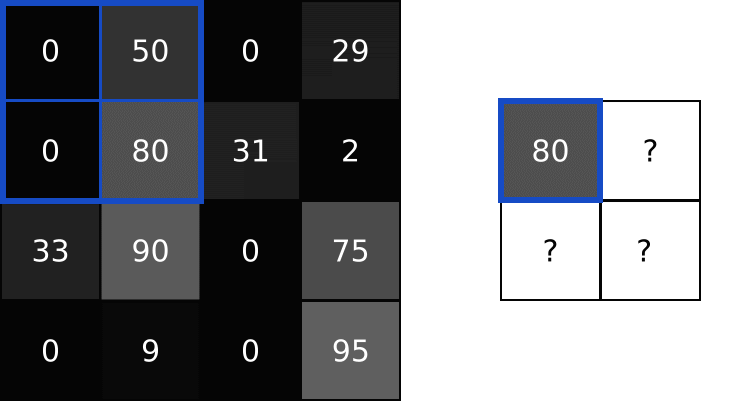

##Dropout

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

Dropout has been widely used in deep learning to prevent overfitting. Dropout momentarily (in a batch of input data) switches off some neurons in a layer so that they do not contribute any information or learn any information during those updates, and the onus falls on other active neurons to learn harder and reduce the error.

Dropout reduces reliance on any single feature by ensuring that feature is not always available, forcing the model to look for different potential hints, rather than just sticking with one -- which would easily allow the model to overfit on any apparently good hint. Therefore, this also should help reduce overfit.

In [ ]:
model_x.add(tf.keras.layers.Dropout(0.1))

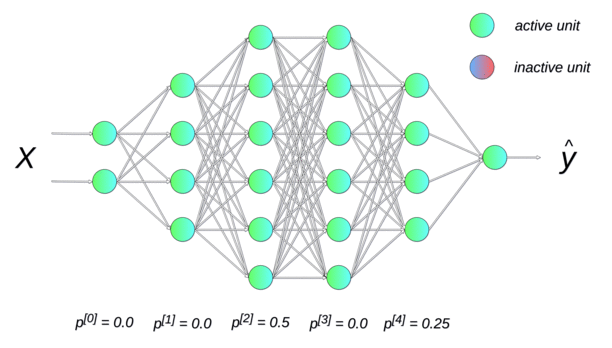

Some people think dropout should not be used in convolutional layers because convolutional layers have fewer parameters and are less likely to overfit. Another consideration that bolsters the latter view is that since the gradient updates for the weights of convolutional layers are the average of all the gradients from all the convolutions, randomly killing nodes will slow down the training process.



Despite that, it has been seen in practice that dropout does provide regularization for al kind of neural network architectures. It also provides additional benefits from the perspective of Bayesian learning. However, depending on the task, dropout may or may not influence the accuracy of your model. If you want to apply dropout in convolutional layers, just make sure that you evaluate the training process on the validation set with and without dropout to see if it makes a difference.

##Batch Norm
Batch normalization (BN) solves a problem called "internal covariate shift". To understand why it helps, you’ll need to first understand what covariate shift actually is.

“Covariates” is just another name for the input features, often written as X. "Internal covariate shift" means the distribution of the features is different in different parts of the training/test data, (breaking something called the IID assumption used across most of ML --- do a search for it if you are curious). This problem occurs frequently in medical data (where you have training samples from one age group, but you want to classify something coming from another age group), or finance (due to changing market conditions).

This lack of similarity in some conditions/constraints between training samples and test samples or even different subsets of the training data, the feature distribution can drift --- or there is a "covariate shift" --- between layers of the network, i.e. going from (say) layer 2 to layer 3. This happens because, as the network learns and the weights are updated, the distribution of outputs of a specific layer in the network changes. This forces the higher layers to adapt to that drift, which slows down learning.

Batch normalization (BN) mitigates this feature drift (or internal covariate shift), and consequent slowdown, by making the data flowing between intermediate layers of the network look like "whitened data" --- or data that does not have correlation or dependencies between its features. Thus, you can have a higher learning rate, and overall faster training process.

Since BN has a regularizing effect, it also means you can use it instead of dropout, which is helpful as dropout usually slows down training.

Source:https://stackoverflow.com/questions/41269570/what-is-batch-normalizaiton-why-using-it-how-does-it-affect-prediction

In [ ]:
model_x.add(tf.keras.layers.BatchNormalization())

# Fully Realized CNN models
Fully realized CNN models are built with appropriate regularization techniques which cope with the problem of "overfitting" i.e. when the difference between training error and the test error is too high.

In the code snippet above,  `model_x` can be called a module of a CNN. This module is a subset of layers that regularize one set of feature maps before another convolution layer is applied to them.

Lets make a model that is more viable in real life situations.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Dropout(0.1,input_shape = (None, 13, 13, 32)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Dropout(0.1,input_shape = (None, 8, 8, 32)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(training_images, training_labels, epochs=10)

## Question 4

When would you use dropout layers?

When would you use batch normalizing layers?

### Answer 4

< *Type your answer here* >

# Cifar100 Dataset

The Fasion MNIST dataset is more complex than the MNIST dataset, but it lacks something you would find in real life images: colors; an RGB Scale. So in order to learn how to deal with RGB data, we shall employ the CIFAR 100 dataset. It is similar to the CIFAR 10 dataset but with 100 classes which can be classed into 20 superclasses(higher level of abstraction).

Each class has 600 images and each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

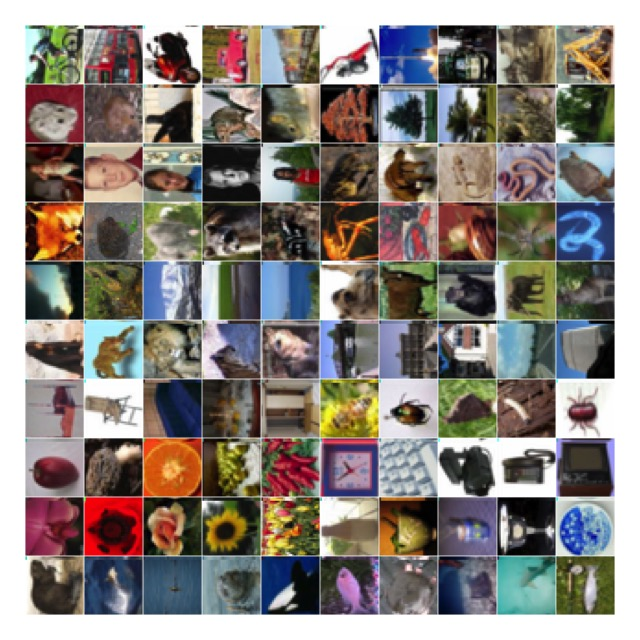

In [ ]:
cifar_100 = tf.keras.datasets.cifar100
(training_images, training_labels), (test_images, test_labels) = cifar_100.load_data(label_mode="coarse")
training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

## Bonus Question

Build and train a classification model for the CIFAR 100 dataset.

### Bonus Answer

In [ ]:
model = tf.keras.models.Sequential([
# Define your classification model
])


model.compile(optimizer=# Pick an optimizer
              , loss=# Pick a loss function
              , metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(training_images, training_labels, epochs=50)

# Upload this Colab Notebook to your Github repository. Also add your *reflections* on today's learning in README.md

#Fun Resources
Visualizing what CNNs have learned and explaining them.
* https://distill.pub/2019/activation-atlas/

* https://poloclub.github.io/cnn-explainer/

* https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html
